# Get data

In [ ]:
%cd '/content/drive/MyDrive/Magang/DDB/keras model sentimen/learn sentiment'

/content/drive/MyDrive/Magang/DDB/keras model sentimen/learn sentiment


In [ ]:
!pwd

/content/drive/MyDrive/Magang/DDB/keras model sentimen/learn sentiment


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
with open('train.ft.txt', 'r') as file:
    lines = file.readlines() # this type would be a list

In [ ]:
lines[0]

In [ ]:
# create a dataframe

import pandas as pd
DF_text_data = pd.DataFrame()

In [ ]:
texts = []
labels = []

# detect the text and its label either its positive or negative
for line in lines:
    line=line.split()
    labels.append(1) if line[0] =="__label__2" else labels.append(0)
    texts.append(" ".join(line[1:]))

# store in dataframe
DF_text_data['reviews'] = texts
DF_text_data['labels'] = labels

In [ ]:
DF_text_data.to_csv('read_data.csv', index=False)

# Preprocessing

In [ ]:
%cd '/content/drive/MyDrive/Magang/DDB/keras model sentimen/learn sentiment'

/content/drive/MyDrive/Magang/DDB/keras model sentimen/learn sentiment


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
DF_text_data = pd.read_csv('read_data.csv')
DF_text_data.head(1)

,reviews,labels
0,Stuning even for the non-gamer: This sound tra...,1


In [ ]:
from sklearn import model_selection

_, X_data,_, y_data = \
    model_selection.train_test_split(DF_text_data['reviews'],
                                     DF_text_data['labels'], test_size=0.01)

# using 0.01 of entire dataset which is 3.6 million dataset in total

In [ ]:
len(X_data)

36000

In [ ]:
# reset the index of the pandas series dataset
# transform the series into dataframe

X_data = X_data.reset_index(drop=True)
X_data = X_data.to_frame()

y_data = y_data.reset_index(drop=True)
y_data = y_data.to_frame()


In [ ]:
# concatinating x and y ada with respect to the column

train_data = pd.concat([X_data, y_data], axis=1)
train_data

,reviews,labels
0,Firebird: This is the most disappointing book ...,0
1,Love it: I love this DVD. The one I have there...,1
2,Informative and Interesting: This movie is so ...,1
3,Pure Gold: I saw this movie in a blockbuster a...,1
4,Bissell Lavender Essence: I shampooed my large...,0
...,...,...
35995,Best case I have had for the phone: This case ...,1
35996,It's a low budget hit!: My son has responded t...,1
35997,I'm 36 yo and I love it too: It was a gift for...,1
35998,Ancient gem: I discovered this band (and album...,1


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def preprocessing(text):
    '''
    1. transform all alphabet into lower case
    2. removes all punctuation, numbers, and special character
    '''
    text = text.lower()
    text = re.sub(r'[^A-Za-z]',' ', text)
    return text

def tokenization(text):
    '''
    split the sentence into list of words
    '''
    token = word_tokenize(text)
    return token

def remove_stopwords(tokenized_text):
    '''
    filter out stopwords from the tokenized text (list of words)
    '''
    words = [i for i in tokenized_text if i not in stopwords.words("english")]
    return words

def lemmatization(removed_stopwords):
    '''
    find the root form of each word
    '''
    processed = [lemmatizer.lemmatize(word) for word in removed_stopwords]
    return " ".join(processed)

In [ ]:
train_data['reviews'][0]

'Firebird: This is the most disappointing book by this author and I have read everything she has written that I\'ve found. The book doesn\'t get "off the ground" for me. She can do much better.'

In [ ]:
# applying the preprocessing function to the dataframe

preproces = train_data['reviews'].apply(preprocessing)
preproces[0:3]

0    firebird  this is the most disappointing book ...
1    love it  i love this dvd  the one i have there...
2    informative and interesting  this movie is so ...
Name: reviews, dtype: object

In [ ]:
# applying the tokenization function to the dataframe

tokenize = preproces.apply(tokenization)
tokenize[0:3]

0    [firebird, this, is, the, most, disappointing,...
1    [love, it, i, love, this, dvd, the, one, i, ha...
2    [informative, and, interesting, this, movie, i...
Name: reviews, dtype: object

In [ ]:
# applying the remove_stopwords function to the dataframe

remove_sw = tokenize.apply(remove_stopwords)
remove_sw[0:3]

0    [firebird, disappointing, book, author, read, ...
1    [love, love, dvd, one, episodes, first, one, b...
2    [informative, interesting, movie, interesting,...
Name: reviews, dtype: object

In [ ]:
# applying the lemmatization function to the dataframe

lemmatize = remove_sw.apply(lemmatization)
lemmatize[0:3]

0    firebird disappointing book author read everyt...
1    love love dvd one episode first one blue room ...
2    informative interesting movie interesting info...
Name: reviews, dtype: object

In [ ]:
# store preprocessed reviwes into dataframe

train_data['preprocessed_reviews'] = lemmatize

In [ ]:
train_data.head(2)

,reviews,labels,preprocessed_reviews
0,Firebird: This is the most disappointing book ...,0,firebird disappointing book author read everyt...
1,Love it: I love this DVD. The one I have there...,1,love love dvd one episode first one blue room ...


In [ ]:
# store data frame into csv format without index column

train_data.to_csv('prepro_data.csv', index=False)

# feature extraction

In [ ]:
data = pd.read_csv('prepro_data.csv')

In [ ]:
data.head(3)

In [ ]:
# split the dataset into two categories, which are train data and test data

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
                data['preprocessed_reviews'], data['labels'],
                test_size=0.4,
                random_state=42
                )

In [ ]:
# data['preprocessed_reviews']
# type(data['preprocessed_reviews'])

In [ ]:
ytrain.value_counts()

In [ ]:
ytest.value_counts()

### Tf-idf (Term Frequency-Inverse Document Frequency):

- Tf-idf is a numerical statistic that reflects the importance of a word in a document relative to the entire document collection. <br>
 **It considers two factors:**
- Term Frequency (TF): How often a word appears in a specific document.
- Inverse Document Frequency (IDF): How common the word is across all documents in the collection.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

# fitting the vectorizer to the training data set
# and transforming it into the matrix that contains numerical value
xtrain_tran = tfidf_vectorizer.fit_transform(xtrain)

In [ ]:
# SMOTE (Synthetic Minority Oversampling Technique) from the imbalanced-learn
# library to oversample the minority class in your training data

# random_state=42: This sets the random seed for reproducibility. Fixing the
# random seed ensures that you get the same oversampled data whenever you run this code.

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(xtrain_tran, ytrain)

In [ ]:
# load the logistic regression model

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

In [ ]:
# fitting the classifier to the oversampled data

classifier.fit(oversampled_X, oversampled_Y)

LogisticRegression()

In [ ]:
# transforming the test data to be an input to the model

xtesttran = tfidf_vectorizer.transform(xtest)

In [ ]:
ypred = classifier.predict(xtesttran)

1. Precision:
- Precision measures the proportion of predicted positive cases that were actually positive.
- It answers the question: "Out of all the data points the model labeled as positive, how many were truly positive?"

2. Recall:
- Recall measures the proportion of actual positive cases that were correctly identified by the model.
- It answers the question: "Out of all the actual positive cases in the data, how many did the model identify correctly?"

3. F1-score:
- F1-score is a harmonic mean between precision and recall.
- It provides a balanced view of both precision and recall, aiming to capture how well the model performs overall.

4. Support:

- Support refers to the total number of true instances for a particular class in the test dataset.
- It helps understand the class distribution and the number of data points used to evaluate the model for each class.

5. Accuracy (weighted avg):

- Accuracy is the overall proportion of correctly classified test instances.
- The weighted avg row specifically calculates accuracy considering the class imbalance (if present) by weighting the accuracy for each class based on its support.

6. Macro Avg:

- Macro average calculates metrics (precision, recall, F1-score) by averaging them unweighted across all classes.
- It treats each class equally, regardless of its support (number of data points). This can be useful if you have many classes with varying sizes.

7. Weighted Avg:

- Weighted average calculates metrics by averaging them weighted based on the support of each class.
- It gives more weight to classes with more data points, reflecting the overall performance on the imbalanced dataset (if present).

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7180
           1       0.87      0.87      0.87      7220

    accuracy                           0.87     14400
   macro avg       0.87      0.87      0.87     14400
weighted avg       0.87      0.87      0.87     14400



In [ ]:
# createing 2nd classifier to predict without oversampled dataset

classifier2 =  LogisticRegression()
tfidf_vectorizer2 = TfidfVectorizer()

In [ ]:
# fitting the vectorizer to the train dataset
#
xtraintran2 = tfidf_vectorizer2.fit_transform(xtrain)

In [ ]:
# fitting the model to the preprocessed train dataset
classifier2.fit(xtraintran2, ytrain)

LogisticRegression()

In [ ]:
# transforming the test data so it could be inputted into the
# classifier model

xtesttran2 = tfidf_vectorizer2.transform(xtest)
ypred2 = classifier.predict(xtesttran2)

In [ ]:
print(classification_report(ypred2,ytest))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7180
           1       0.87      0.87      0.87      7220

    accuracy                           0.87     14400
   macro avg       0.87      0.87      0.87     14400
weighted avg       0.87      0.87      0.87     14400



                           confusion_matrix`
|          | Positive Sentiment     | Negative Sentiment |
|--------------|-----------|------------|
| Actual Positive Sentiment | 6234   | 946        |
| Negative Sentiment      | 941  | 6279       |

<br>

                               confusion_matrix
|          | Positive Sentiment     | Negative Sentiment |
|--------------|-----------|------------|
| Actual Positive Sentiment | True Positive | False Positive  |
| Negative Sentiment      | False Negative  | True Positive       |

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(ypred2,ytest))

[[6234  946]
 [ 941 6279]]


In [ ]:
print(confusion_matrix(ypred,ytest))

[[6234  946]
 [ 941 6279]]


In [ ]:
import joblib

In [ ]:
# store the classifier model and the vectorizer

joblib.dump(classifier,'Textclassifier_logreg.pkl')
joblib.dump(tfidf_vectorizer, 'Tfidf.pkl')

['Tfidf.pkl']

# test predict

In [ ]:
%cd '/content/drive/MyDrive/Magang/DDB/keras model sentimen/learn sentiment'

/content/drive/MyDrive/Magang/DDB/keras model sentimen/learn sentiment


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# lemmatizer used for finding each word root form
lemmatizer = WordNetLemmatizer()

def preprocessing(text):
    text = text.lower()

    text = re.sub(r'[^A-Za-z]',' ', text)

    token = word_tokenize(text)

    words = [i for i in token if i not in stopwords.words("english")]

    processed = [lemmatizer.lemmatize(word) for word in words]

    return " ".join(processed)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import joblib

classifier = joblib.load(r'Textclassifier_logreg.pkl')
preprocess = joblib.load(r"Tfidf.pkl")

1 : Positive <br>
0 : Negative

In [ ]:
# text = 'This is really bad'
text = "The weather is beautiful today, perfect for a walk in the park"

# preprocessing and transforming text input so it could be fed into the model
text = preprocessing(text)
text = preprocess.transform([text])
final = classifier.predict(text)
final

array([1])

#  model evaluation

In [ ]:
%cd '/content/drive/MyDrive/Magang/DDB/keras model sentimen/learn sentiment'

/content/drive/MyDrive/Magang/DDB/keras model sentimen/learn sentiment


In [ ]:
import pandas as pd
import numpy as np

# get preprocessed data
data = pd.read_csv('prepro_data.csv')

In [ ]:
data.head(2)

,reviews,labels,preprocessed_reviews
0,Firebird: This is the most disappointing book ...,0,firebird disappointing book author read everyt...
1,Love it: I love this DVD. The one I have there...,1,love love dvd one episode first one blue room ...


In [ ]:
from sklearn.model_selection import train_test_split

# splitting train and test data
xtrain, xtest, ytrain, ytest = train_test_split(data['preprocessed_reviews'], data['labels'], test_size=0.4 , random_state=42)

In [ ]:
ytest.value_counts()

1    7225
0    7175
Name: labels, dtype: int64

In [ ]:
import joblib

classifier = joblib.load(r'Textclassifier_logreg.pkl')
preprocess = joblib.load(r"Tfidf.pkl")

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
xtest_trans = preprocess.transform(xtest)
ypred = classifier.predict(xtest_trans)

In [ ]:
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.8689583333333334


# test predict on MyPertamina Data from Playstore

## before using deep cleaned data

In [ ]:
%cd '/content/drive/MyDrive/Magang/DDB/keras model sentimen/learn sentiment'

/content/drive/MyDrive/Magang/DDB/keras model sentimen/learn sentiment


In [ ]:
import joblib

classifier = joblib.load(r'Textclassifier_logreg.pkl')
preprocess = joblib.load(r"Tfidf.pkl")

In [ ]:
%cd '/content/drive/MyDrive/Magang/DDB/sentimen mypertamina playstore'

/content/drive/MyDrive/Magang/DDB/sentimen mypertamina playstore


In [ ]:
import pandas as pd

data = pd.read_csv('mypertaminaTranslate.csv', index_col=False)
data.head(2)

,Unnamed: 0,content,tweet_english
0,0,aplikasi harus mudah malah balik sulit antre u...,the application should be easy but instead it'...
1,1,aplikasi bulan akhir kecewa sekali nya nopol d...,"Last month's application, very disappointed wi..."


In [ ]:
data = data[['tweet_english']]
data.head(2)

,tweet_english
0,the application should be easy but instead it'...
1,"Last month's application, very disappointed wi..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_english  185 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def preprocessing(text):
    text = text.lower()

    text = re.sub(r'[^A-Za-z]',' ', text)

    token = word_tokenize(text)

    words = [i for i in token if i not in stopwords.words("english")]

    processed = [lemmatizer.lemmatize(word) for word in words]

    return " ".join(processed)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
prepro = data['tweet_english'].apply(preprocessing)

In [ ]:
temp_df = pd.concat([data, prepro], axis=1)
temp_df.columns = ['reviews', 'clean_review']
temp_df.head(2)

,reviews,clean_review
0,the application should be easy but instead it'...,application easy instead difficult queue long ...
1,"Last month's application, very disappointed wi...",last month application disappointed number num...


In [ ]:
processed = preprocess.transform(prepro)

In [ ]:
ypred = classifier.predict(processed)

In [ ]:
import numpy as np

unique_elements, counts = np.unique(ypred, return_counts=True)

# Print unique elements and their counts
for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

0: 150
1: 35


In [ ]:
data = pd.concat([data, pd.DataFrame(ypred)], axis=1)
data.columns = ['reviews', 'sentiment']

In [ ]:
data.head(5)

,reviews,sentiment
0,the application should be easy but instead it'...,0
1,"Last month's application, very disappointed wi...",0
2,the application is rubbish for more than a yea...,1
3,"application for confusion, the list is very di...",0
4,Suggestions for the Android biodata content pa...,0


In [ ]:
sentiment = data['sentiment']
sentiment = ['Positive' if i == 1 else 'Negative' for i in sentiment]
sentiment = pd.DataFrame(
    {'sentiment':sentiment}
)
sentiment.head(5)

,sentiment
0,Negative
1,Negative
2,Positive
3,Negative
4,Negative


In [ ]:
data = pd.concat([data['reviews'], sentiment], axis=1)
data.head(3)

,reviews,sentiment
0,the application should be easy but instead it'...,Negative
1,"Last month's application, very disappointed wi...",Negative
2,the application is rubbish for more than a yea...,Positive


In [ ]:
data[data['sentiment'] == 'Positive']

,reviews,sentiment
2,the application is rubbish for more than a yea...,Positive
16,It's not clear to feel like the queue is full ...,Positive
19,"it's not easy, it's difficult to register and ...",Positive
29,"the application is really bad, it's not easy, ...",Positive
42,"Even if the application is easy, it's difficul...",Positive
43,"The verification took a long time, even though...",Positive
50,"The payment method is good, it's easier, just ...",Positive
59,"The UI is beautiful, responsive, buy Pertamax,...",Positive
65,"the economy is difficult, adding an easy appli...",Positive
69,"The Pertamina application is very rocky, the s...",Positive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-19-f757afbdc29b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


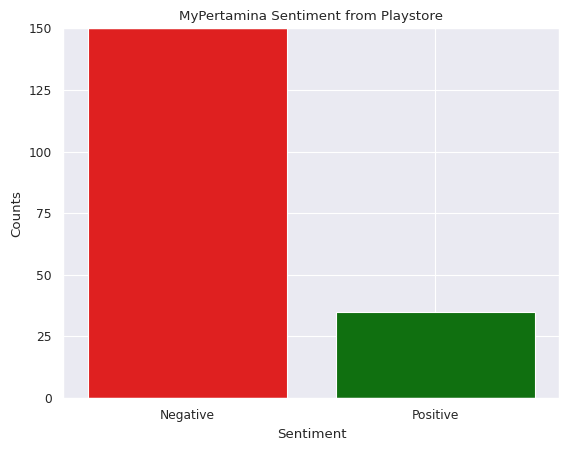

In [ ]:
sns.set_style('darkgrid')

sns.set_context('paper')

sns.barplot(
    x = ['Negative', 'Positive'],
    y = counts,
    palette=['red', 'green']
    # palette=sns.color_palette('colorblind')
)

plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.title('MyPertamina Sentiment from Playstore')
plt.ylim(bottom=0, top=150)
plt.grid(True)
plt.yticks(np.arange(0, 175, 25))

plt.show()

In [ ]:
%cd '/content/drive/MyDrive/Magang/DDB/sentimen mypertamina playstore'

/content/drive/MyDrive/Magang/DDB/sentimen mypertamina playstore


In [ ]:
df = pd.read_csv('filtered_data.csv')

In [ ]:
df = df[['content', 'score']]
df.head(5)

,content,score
0,"Aplikasi itu harusnya memudahkan, ini malah se...",1
1,Aplikasinya dalam 2 bulan terakhir ini mengece...,1
2,Aplikasi sampah. Sudah setahun lebih gak ada i...,1
3,"Aplikasi tidak berguna dan membingungkan, pend...",1
4,SUGGESTION: Pada halaman ketika mengisi biodat...,3


In [ ]:
unique_elements, counts = np.unique(df['score'], return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

1: 150
2: 15
3: 13
4: 4
5: 3


<ipython-input-24-9f4f358a7068>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


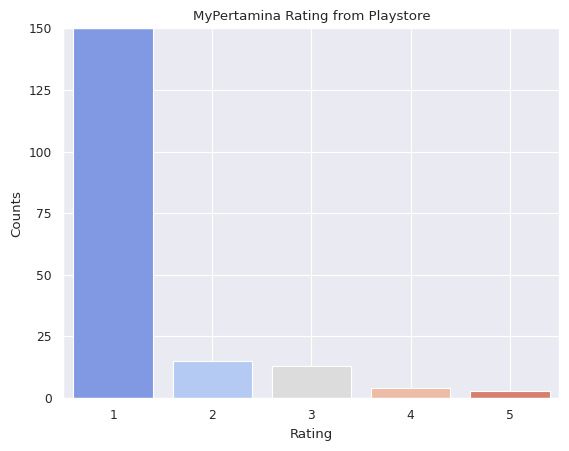

In [ ]:
sns.set_style('darkgrid')

sns.set_context('paper')

palette = sns.color_palette("coolwarm", 5)

sns.barplot(
    x = unique_elements,
    y = counts,
    # palette=['red', 'green']
    palette=palette
)

plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('MyPertamina Rating from Playstore')
plt.ylim(bottom=0, top=150)
plt.grid(True)
plt.yticks(np.arange(0, 175, 25))

plt.show()

## after using deep cleaned

In [ ]:
%cd '/content/drive/MyDrive/Magang/DDB/sentimen mypertamina playstore'

/content/drive/MyDrive/Magang/DDB/sentimen mypertamina playstore


In [ ]:
import pandas as pd
df = pd.read_csv("deep_cleaned_ready_for_predict_playstore.csv")
df.head(5)

,content,preprocessed_content
0,"easy application, difficult to queue, turn to ...",easy application difficult queue turn scan bar...
1,"Disappointed application, police number, appea...",disappointed application police number appeal ...
2,rubbish application level change vehicle data ...,rubbish application level change vehicle data ...
3,"Confused application, list, difficult, convolu...",confused application list difficult convoluted...
4,Suggestions for the biodata content page on An...,suggestion biodata content page android select...


In [ ]:
%cd '/content/drive/MyDrive/Magang/DDB/keras model sentimen/learn sentiment'

/content/drive/MyDrive/Magang/DDB/keras model sentimen/learn sentiment


In [ ]:
import joblib

classifier = joblib.load(r'Textclassifier_logreg.pkl')
preprocess = joblib.load(r"Tfidf.pkl")

In [ ]:
# hasil deep cleaning ga perlu di preprocess lagi

In [ ]:
data = df['preprocessed_content']
data.head()

0    easy application difficult queue turn scan bar...
1    disappointed application police number appeal ...
2    rubbish application level change vehicle data ...
3    confused application list difficult convoluted...
4    suggestion biodata content page android select...
Name: preprocessed_content, dtype: object

In [ ]:
processed = preprocess.transform(data)

In [ ]:
ypred = classifier.predict(processed)

In [ ]:
import numpy as np

unique_elements, counts = np.unique(ypred, return_counts=True)

# Print unique elements and their counts
for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

0: 164
1: 21


In [ ]:
sentiment = pd.Series(ypred)

In [ ]:
sentiment = ['Positive' if i == 1 else 'Negative' for i in sentiment]
sentiment = pd.DataFrame(
    {'sentiment':sentiment}
)
sentiment.head(5)

,sentiment
0,Negative
1,Negative
2,Negative
3,Negative
4,Negative


In [ ]:
%cd '/content/drive/MyDrive/Magang/DDB/sentimen mypertamina playstore'

/content/drive/MyDrive/Magang/DDB/sentimen mypertamina playstore


In [ ]:
original_data = pd.read_csv('filtered_data.csv')
original_data = original_data['content']
original_data.head(5)

0    Aplikasi itu harusnya memudahkan, ini malah se...
1    Aplikasinya dalam 2 bulan terakhir ini mengece...
2    Aplikasi sampah. Sudah setahun lebih gak ada i...
3    Aplikasi tidak berguna dan membingungkan, pend...
4    SUGGESTION: Pada halaman ketika mengisi biodat...
Name: content, dtype: object

In [ ]:
df = pd.concat([original_data, sentiment], axis=1)
df.columns = ['original_reviews', 'sentiment']
df.head()

,original_reviews,sentiment
0,"Aplikasi itu harusnya memudahkan, ini malah se...",Negative
1,Aplikasinya dalam 2 bulan terakhir ini mengece...,Negative
2,Aplikasi sampah. Sudah setahun lebih gak ada i...,Negative
3,"Aplikasi tidak berguna dan membingungkan, pend...",Negative
4,SUGGESTION: Pada halaman ketika mengisi biodat...,Negative


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-41-0c8565e79aed>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


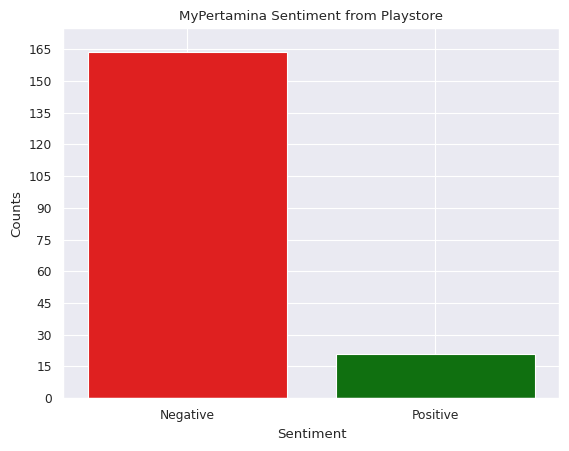

In [ ]:
sns.set_style('darkgrid')

sns.set_context('paper')

sns.barplot(
    x = ['Negative', 'Positive'],
    y = counts,
    palette=['red', 'green']
    # palette=sns.color_palette('colorblind')
)

plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.title('MyPertamina Sentiment from Playstore')
plt.ylim(bottom=0, top=175)
plt.grid(True)
plt.yticks(np.arange(0, 175, 15))

plt.show()

In [ ]:
df[df['sentiment'] == 'Positive']

,original_reviews,sentiment
19,"Ini bukannya memudahkan tapi menyulitkan, saya...",Positive
29,"Aplikasinya jelek bgt, bukan mempermudah tapi ...",Positive
42,Bukannya aplikasi memudahkan malah menyulitkan...,Positive
50,Untuk metode pembayaran sebaiknya lebih di per...,Positive
65,Perekonomian sudah sulit di tambah aplikasi ya...,Positive
69,Aplikasi my pertamina sangat membatu tolong do...,Positive
71,"Pertamina mantap, semakin canggih, pelayanan j...",Positive
76,Sangat membantu di saat bensin habis kita bisa...,Positive
83,Bersyukur aku blm daftar sepenuh. Ternyata ban...,Positive
86,"Aneh, aplikasi pertamina tapi ga ada harga pro...",Positive


# test predict on MyPertamina Data from APPSTORE

## before using deep cleaned data

In [ ]:
%cd '/content/drive/MyDrive/Magang/DDB/keras model sentimen/learn sentiment'

/content/drive/MyDrive/Magang/DDB/keras model sentimen/learn sentiment


In [ ]:
import joblib

classifier = joblib.load(r'Textclassifier_logreg.pkl')
preprocess = joblib.load(r"Tfidf.pkl")

In [ ]:
%cd '/content/drive/MyDrive/Magang/DDB/sentiment mypertamina'

/content/drive/MyDrive/Magang/DDB/sentiment mypertamina


In [ ]:
import pandas as pd

data = pd.read_csv('mypertaminaTranslate.csv', index_col=False)
data.head(2)

,Unnamed: 0,Review,tweet_english
0,0,daftar aplikasi utk orang tua beda kota dentid...,List of applications for parents from differen...
1,1,baik layan beberapa kali mau bayar pakai qr er...,good service several times want to pay using q...


In [ ]:
data = data[['tweet_english']]
data.head(2)

,tweet_english
0,List of applications for parents from differen...
1,good service several times want to pay using q...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_english  79 non-null     object
dtypes: object(1)
memory usage: 760.0+ bytes


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def preprocessing(text):
    text = text.lower()

    text = re.sub(r'[^A-Za-z]',' ', text)

    token = word_tokenize(text)

    words = [i for i in token if i not in stopwords.words("english")]

    processed = [lemmatizer.lemmatize(word) for word in words]

    return " ".join(processed)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
prepro = data['tweet_english'].apply(preprocessing)

In [ ]:
temp_df = pd.concat([data, prepro], axis=1)
temp_df.columns = ['reviews', 'clean_review']
temp_df.head(2)

,reviews,clean_review
0,List of applications for parents from differen...,list application parent different city parent ...
1,good service several times want to pay using q...,good service several time want pay using qr ke...


In [ ]:
processed = preprocess.transform(prepro)

In [ ]:
ypred = classifier.predict(processed)

In [ ]:
import numpy as np

unique_elements, counts = np.unique(ypred, return_counts=True)

# Print unique elements and their counts
for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

0: 64
1: 15


In [ ]:
data = pd.concat([data, pd.DataFrame(ypred)], axis=1)
data.columns = ['reviews', 'sentiment']

In [ ]:
data.head(5)

,reviews,sentiment
0,List of applications for parents from differen...,1
1,good service several times want to pay using q...,0
2,"I haven't registered the application, it's sti...",0
3,error often,0
4,"I've registered, I've been waiting for verific...",0


In [ ]:
sentiment = data['sentiment']
sentiment = ['Positive' if i == 1 else 'Negative' for i in sentiment]
sentiment = pd.DataFrame(
    {'sentiment':sentiment}
)
sentiment.head(5)

,sentiment
0,Positive
1,Negative
2,Negative
3,Negative
4,Negative


In [ ]:
data = pd.concat([data['reviews'], sentiment], axis=1)
data.head(3)

,reviews,sentiment
0,List of applications for parents from differen...,Positive
1,good service several times want to pay using q...,Negative
2,"I haven't registered the application, it's sti...",Negative


In [ ]:
data[data['sentiment'] == 'Positive']

,reviews,sentiment
0,List of applications for parents from differen...,Positive
14,the application makes it easy the application ...,Positive
17,for developers to consider what is the urgency...,Positive
32,The application is clear and you can register,Positive
43,in good,Positive
50,"The Gembel application is now sophisticated, t...",Positive
55,How come the plate number and frame number are...,Positive
57,not updating yet,Positive
60,comedy app,Positive
61,"You can add a debit card payment for BCA bank,...",Positive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-43-5cd255789056>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


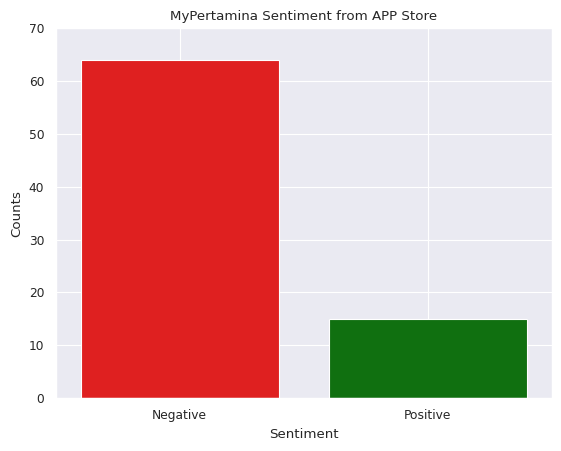

In [ ]:
sns.set_style('darkgrid')

sns.set_context('paper')

sns.barplot(
    x = ['Negative', 'Positive'],
    y = counts,
    palette=['red', 'green']
    # palette=sns.color_palette('colorblind')
)

plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.title('MyPertamina Sentiment from APP Store')
plt.ylim(bottom=0, top=70)
plt.grid(True)
plt.yticks(np.arange(0, 80, 10))

plt.show()

In [ ]:
df = pd.read_csv('appStore_filtered_reviews.csv')
df.head(1)

,Title,Rating,Review,User Name,Date,Is Edited
0,Sangat buruk,1,Saya mendaftarkan aplikasi ini utk orang tua s...,pertaminj,2024-01-01 09:54:16,False


In [ ]:
df = df[['Rating']]
df.head(5)

,Rating
0,1
1,1
2,1
3,1
4,1


In [ ]:
unique_elements, counts = np.unique(df['Rating'], return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

1: 68
2: 3
3: 3
4: 1
5: 4


<ipython-input-47-600677103c7a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


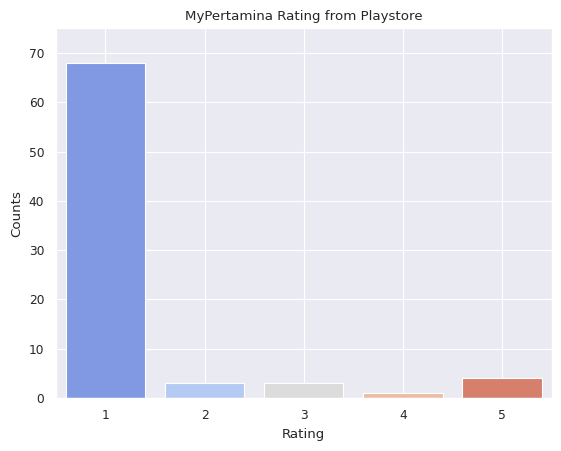

In [ ]:
sns.set_style('darkgrid')

sns.set_context('paper')

palette = sns.color_palette("coolwarm", 5)

sns.barplot(
    x = unique_elements,
    y = counts,
    # palette=['red', 'green']
    palette=palette
)

plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('MyPertamina Rating from Playstore')
plt.ylim(bottom=0, top=75)
plt.grid(True)
plt.yticks(np.arange(0, 80, 10))

plt.show()

## after using deep cleaned

In [ ]:
%cd '/content/drive/MyDrive/Magang/DDB/sentiment mypertamina'

/content/drive/MyDrive/Magang/DDB/sentiment mypertamina


In [ ]:
import pandas as pd
df = pd.read_csv("deep_cleaned_ready_for_predict_appstore.csv")
df.head(5)

,original_reviews,preprocessed_content
0,bad list of applications parents are in differ...,bad list application parent different city par...
1,"server pays incorrectly with the QR code, plea...",server pay incorrectly qr code please pay usin...
2,"Complicated list application application, Bang...",complicated list application application bangk...
3,error barcode error,error barcode error
4,rubbish application potato list wait for verif...,rubbish application potato list wait verificat...


In [ ]:
%cd '/content/drive/MyDrive/Magang/DDB/keras model sentimen/learn sentiment'

/content/drive/MyDrive/Magang/DDB/keras model sentimen/learn sentiment


In [ ]:
import joblib

classifier = joblib.load(r'Textclassifier_logreg.pkl')
preprocess = joblib.load(r"Tfidf.pkl")

In [ ]:
# hasil deep cleaning ga perlu di preprocess lagi

In [ ]:
data = df['preprocessed_content']
data.head()

0    bad list application parent different city par...
1    server pay incorrectly qr code please pay usin...
2    complicated list application application bangk...
3                                  error barcode error
4    rubbish application potato list wait verificat...
Name: preprocessed_content, dtype: object

In [ ]:
processed = preprocess.transform(data)

In [ ]:
ypred = classifier.predict(processed)

In [ ]:
import numpy as np

unique_elements, counts = np.unique(ypred, return_counts=True)

# Print unique elements and their counts
for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

0: 68
1: 11


In [ ]:
sentiment = pd.Series(ypred)

In [ ]:
sentiment = ['Positive' if i == 1 else 'Negative' for i in sentiment]
sentiment = pd.DataFrame(
    {'sentiment':sentiment}
)
sentiment.head(5)

,sentiment
0,Negative
1,Negative
2,Negative
3,Negative
4,Negative


In [ ]:
%cd '/content/drive/MyDrive/Magang/DDB/sentiment mypertamina'

/content/drive/MyDrive/Magang/DDB/sentiment mypertamina


In [ ]:
original_data = pd.read_csv('appStore_filtered_reviews.csv')
original_data = original_data['Review']
original_data.head(5)

0    Saya mendaftarkan aplikasi ini utk orang tua s...
1    Tolong diperbaiki layanannya. Sudah beberapa k...
2    Aplikasi dak jelas, udah daftar tapi masih aja...
3                                        Sering eror !
4    Daftar udah, tapu nunggu verifikasi lebih dari...
Name: Review, dtype: object

In [ ]:
df = pd.concat([original_data, sentiment], axis=1)
df.columns = ['original_reviews', 'sentiment']
df.head()

,original_reviews,sentiment
0,Saya mendaftarkan aplikasi ini utk orang tua s...,Negative
1,Tolong diperbaiki layanannya. Sudah beberapa k...,Negative
2,"Aplikasi dak jelas, udah daftar tapi masih aja...",Negative
3,Sering eror !,Negative
4,"Daftar udah, tapu nunggu verifikasi lebih dari...",Negative


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-24-b32890cfaefe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


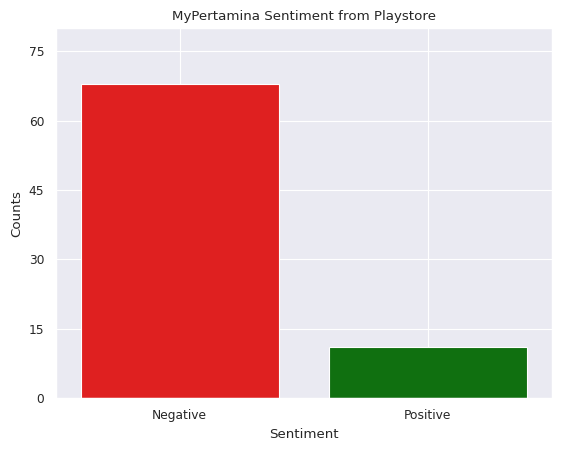

In [ ]:
sns.set_style('darkgrid')

sns.set_context('paper')

sns.barplot(
    x = ['Negative', 'Positive'],
    y = counts,
    palette=['red', 'green']
    # palette=sns.color_palette('colorblind')
)

plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.title('MyPertamina Sentiment from Playstore')
plt.ylim(bottom=0, top=80)
plt.grid(True)
plt.yticks(np.arange(0, 80, 15))

plt.show()

In [ ]:
df[df['sentiment'] == 'Positive']

,original_reviews,sentiment
14,Aplikasi bikin gampang ❌ aplikasi bikin emosi✅,Positive
30,Email dan password sudah benar tapi gk dapet” ...,Positive
34,Mau verifikasi minta otp nggak di kasi DONK!!!,Positive
35,Entah kenapa petugas SPBU di Makassar yg lokas...,Positive
50,aplikasi gembel. zaman uda canggih buat sistem...,Positive
51,Setelah update malah sering crash ato tiba2 ke...,Positive
54,"ayolah, teknologi udh maju lo, masa setiap mau...",Positive
57,Update mulu gaje,Positive
60,Aplikasi komedi,Positive
65,"Kalau nanti semua harus melalui aplikasi ini, ...",Positive
